In [1]:
import os
import glob
import sys
import re

import numpy as np
import pandas as pd
from scipy.misc import derivative
import scipy.integrate as intg
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow.keras
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Constant, RandomNormal

from sklearn.metrics import mean_squared_error
from astroNN.nn.layers import MCDropout

np.random.seed(0)
%matplotlib inline

2024-07-23 19:47:30.673936: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dir_name = '/home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/'
path = r'{}*.NFW.fix.REV.dat'.format(dir_name)
files = glob.glob(path)
print(files)

['/home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC925.NFW.fix.REV.dat', '/home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC2403.NFW.fix.REV.dat', '/home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC4736.NFW.fix.REV.dat', '/home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC2841.NFW.fix.REV.dat', '/home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC2976.NFW.fix.REV.dat', '/home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC2366.NFW.fix.REV.dat', '/home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC3198.NFW.fix.REV.dat', '/home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC6946.NFW.fix.REV.dat', '/home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC3521.NFW.fix.REV.dat', '/home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC3031.NFW.fix.REV.dat', 

In [3]:
for i, file in enumerate(files):
    print(i, file)

0 /home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC925.NFW.fix.REV.dat
1 /home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC2403.NFW.fix.REV.dat
2 /home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC4736.NFW.fix.REV.dat
3 /home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC2841.NFW.fix.REV.dat
4 /home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC2976.NFW.fix.REV.dat
5 /home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC2366.NFW.fix.REV.dat
6 /home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC3198.NFW.fix.REV.dat
7 /home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC6946.NFW.fix.REV.dat
8 /home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC3521.NFW.fix.REV.dat
9 /home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC3031.NFW.fix.REV.dat
10 /home/is

In [4]:
def root_name(file):
    print(file)
    s1 = re.sub(dir_name, '', file)
    print("without dir", s1)
    s = s1.rstrip('.NFW.fix.REV.dat')
    print("root", s)
    return s

In [5]:
roots = []
for name in files:
    roots.append(root_name(name))

/home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC925.NFW.fix.REV.dat
without dir NGC925.NFW.fix.REV.dat
root NGC925
/home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC2403.NFW.fix.REV.dat
without dir NGC2403.NFW.fix.REV.dat
root NGC2403
/home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC4736.NFW.fix.REV.dat
without dir NGC4736.NFW.fix.REV.dat
root NGC4736
/home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC2841.NFW.fix.REV.dat
without dir NGC2841.NFW.fix.REV.dat
root NGC2841
/home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC2976.NFW.fix.REV.dat
without dir NGC2976.NFW.fix.REV.dat
root NGC2976
/home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC2366.NFW.fix.REV.dat
without dir NGC2366.NFW.fix.REV.dat
root NGC2366
/home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC3198.NFW.fix.REV.dat
without dir NGC3198.NFW.fix.RE

In [6]:
# Correct order

# roots = ['NGC2903', 'NGC3521', 'NGC5055', 'NGC2841', 'NGC7331', 'NGC6946', 'NGC2366', 'NGC925',
#          'NGC3621', 'NGC2403', 'NGC3031', 'DDO154', 'NGC2976', 'NGC4736', 'IC2574', 'NGC3198', 'NGC7793']

In [7]:
for name in roots:
    print(name)

NGC925
NGC2403
NGC4736
NGC2841
NGC2976
NGC2366
NGC3198
NGC6946
NGC3521
NGC3031
IC2574
NGC7331
DDO154
NGC7793
NGC3621
NGC5055
NGC2903


In [8]:
dir_name+roots[0]+".NFW.free.REV.dat"

'/home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC925.NFW.free.REV.dat'

In [9]:
roots[13]

'NGC7793'

Model 1/17
----------
NGC925
X_train shape: (76, 1) | y_train shape: (76, 2) | x_val shape: (20, 1) | y_val shape: (20, 2)


2024-07-23 19:47:44.464269: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


16/16 [==============================] - 0s 7ms/step
/home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC925.NFW.fix.REV.dat
without dir NGC925.NFW.fix.REV.dat
root NGC925


/tmp/ipykernel_38092/1134776632.py:93: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


----------
Model 2/17
----------
NGC2403
X_train shape: (230, 1) | y_train shape: (230, 2) | x_val shape: (58, 1) | y_val shape: (58, 2)
16/16 [==============================] - 0s 8ms/step
/home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC2403.NFW.fix.REV.dat
without dir NGC2403.NFW.fix.REV.dat
root NGC2403
----------
Model 3/17
----------
NGC4736
X_train shape: (65, 1) | y_train shape: (65, 2) | x_val shape: (17, 1) | y_val shape: (17, 2)
16/16 [==============================] - 0s 6ms/step
/home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC4736.NFW.fix.REV.dat
without dir NGC4736.NFW.fix.REV.dat
root NGC4736
----------
Model 4/17
----------
NGC2841
X_train shape: (112, 1) | y_train shape: (112, 2) | x_val shape: (29, 1) | y_val shape: (29, 2)
16/16 [==============================] - 0s 11ms/step
/home/isidro/Documents/github/Reconstructing-RC-with-ANN/data/MassModels/NGC2841.NFW.fix.REV.dat
without dir NGC2841.NFW.fix.REV.dat
root N

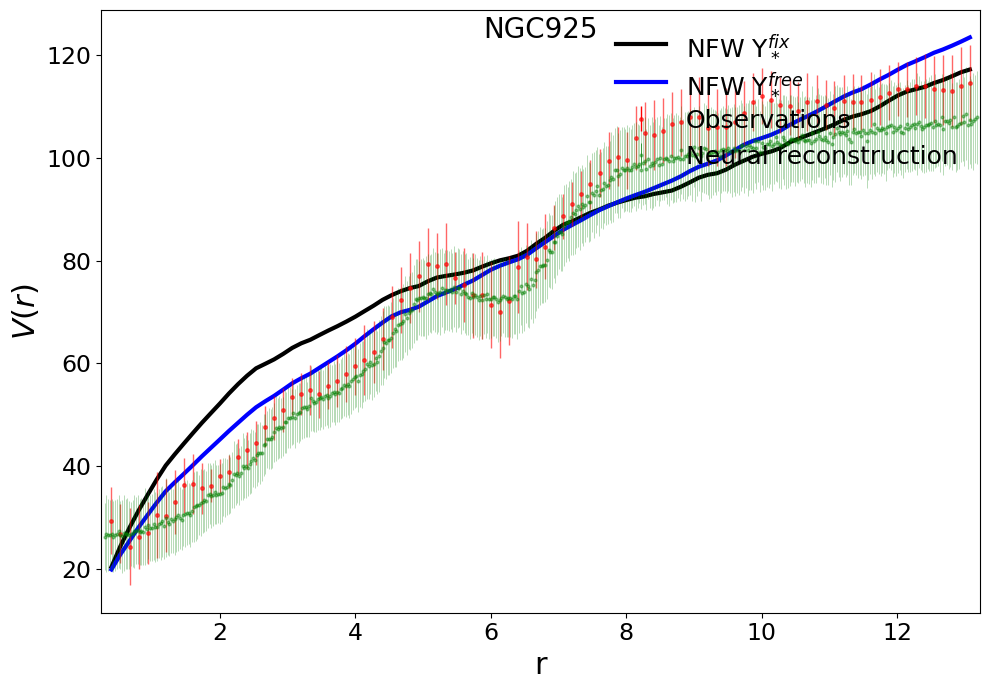

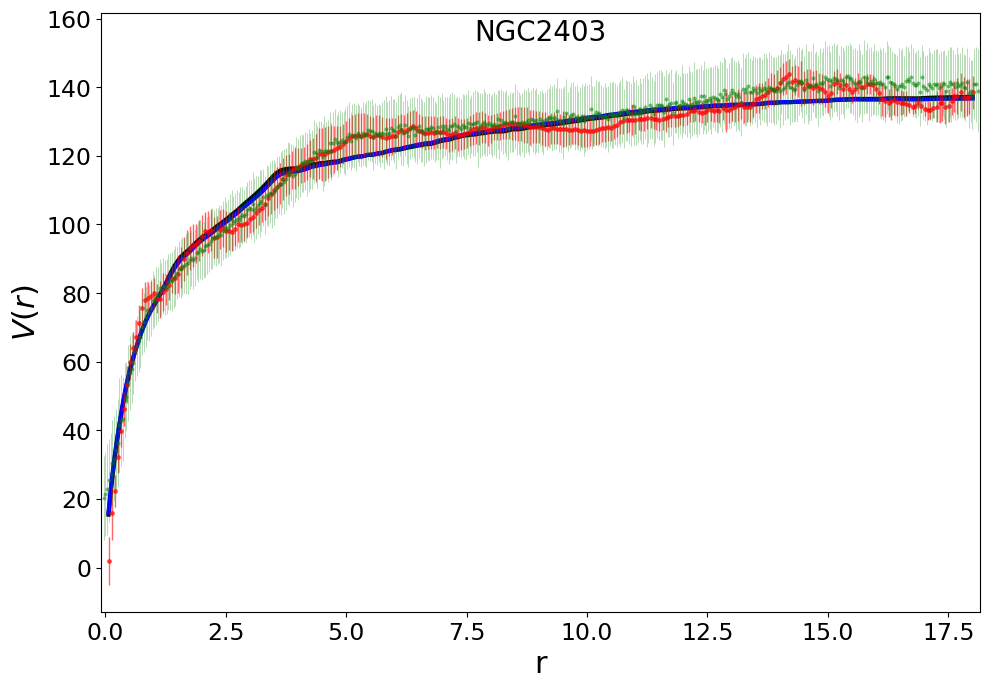

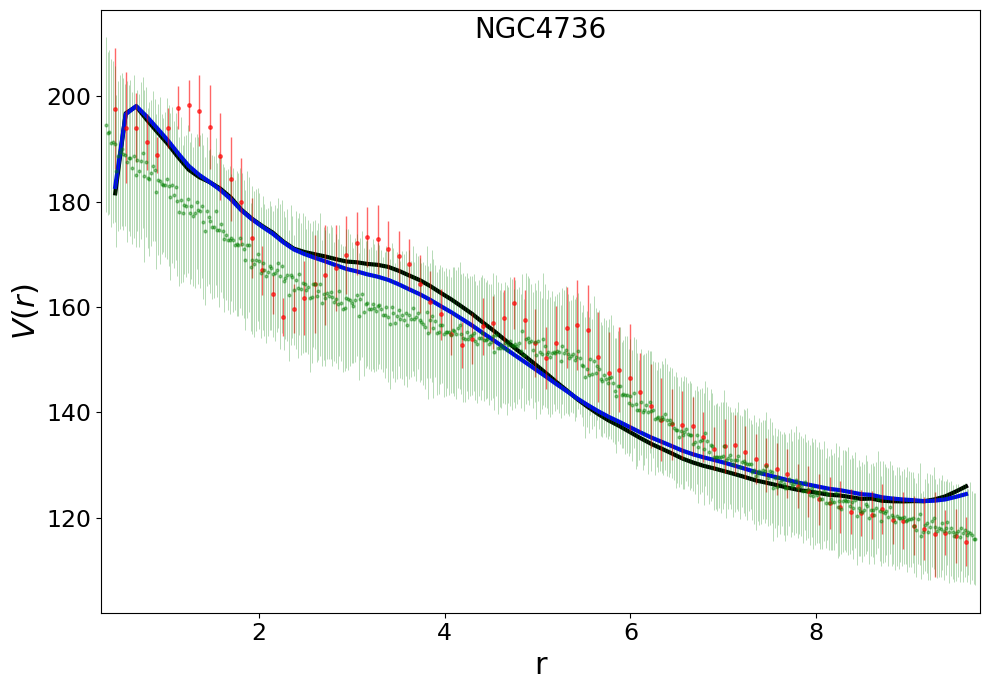

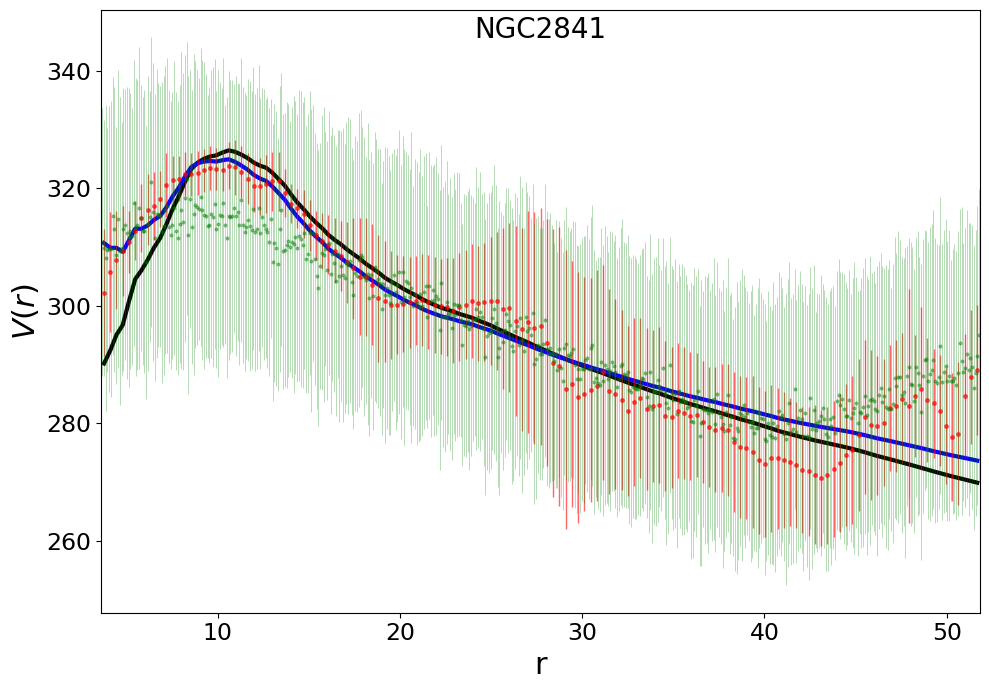

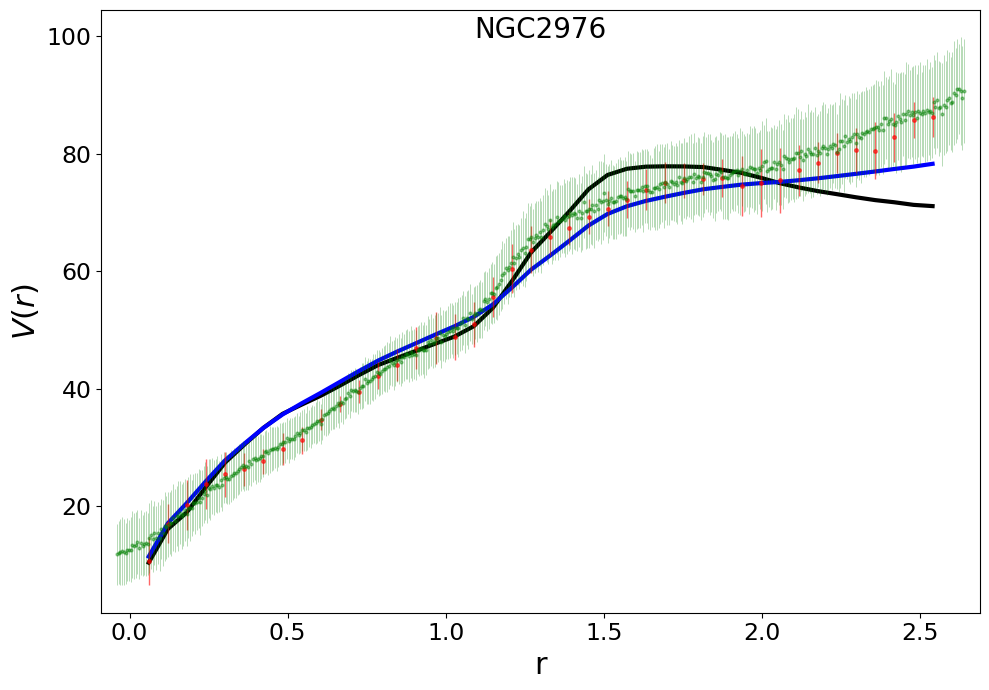

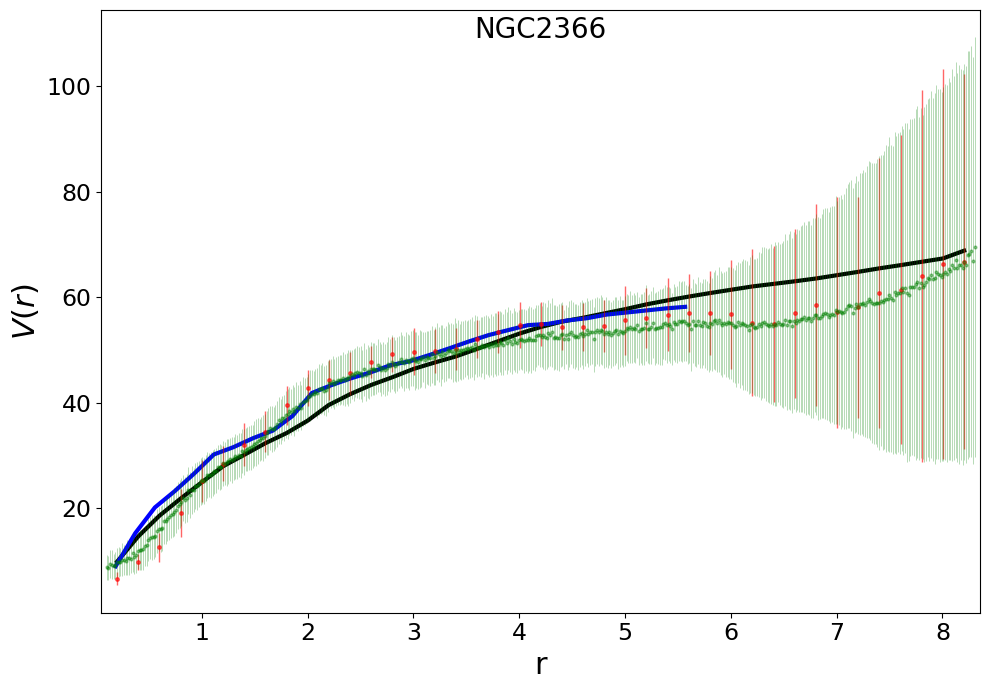

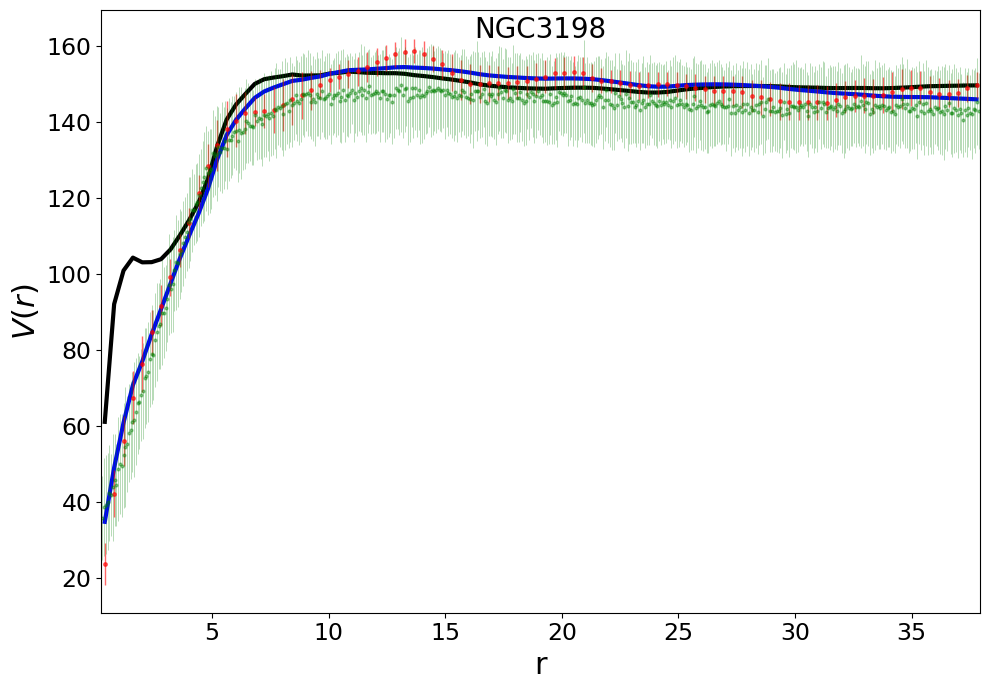

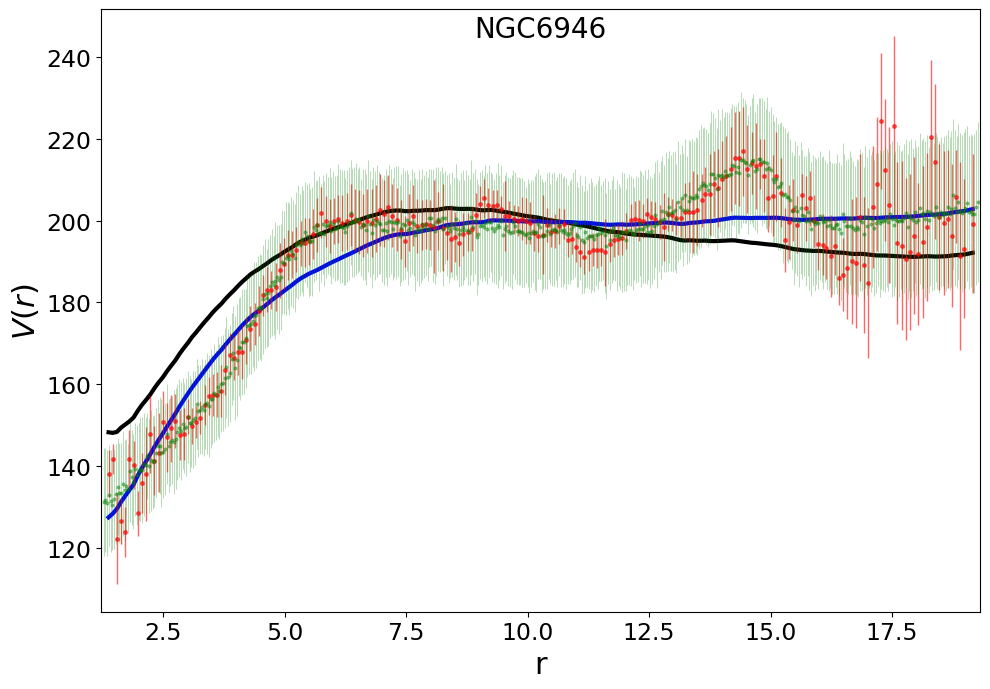

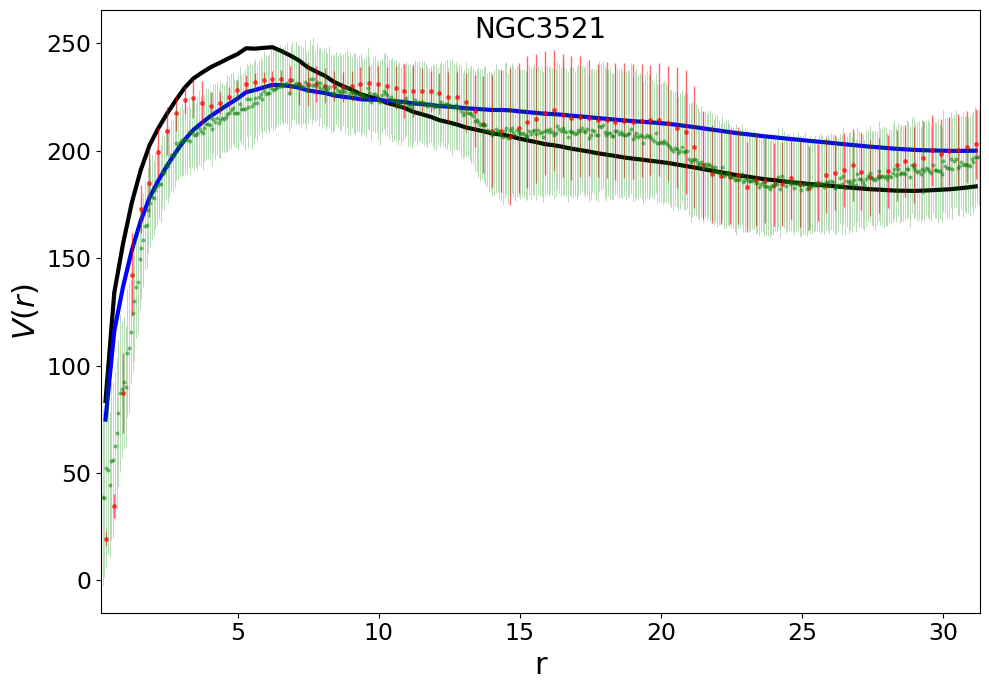

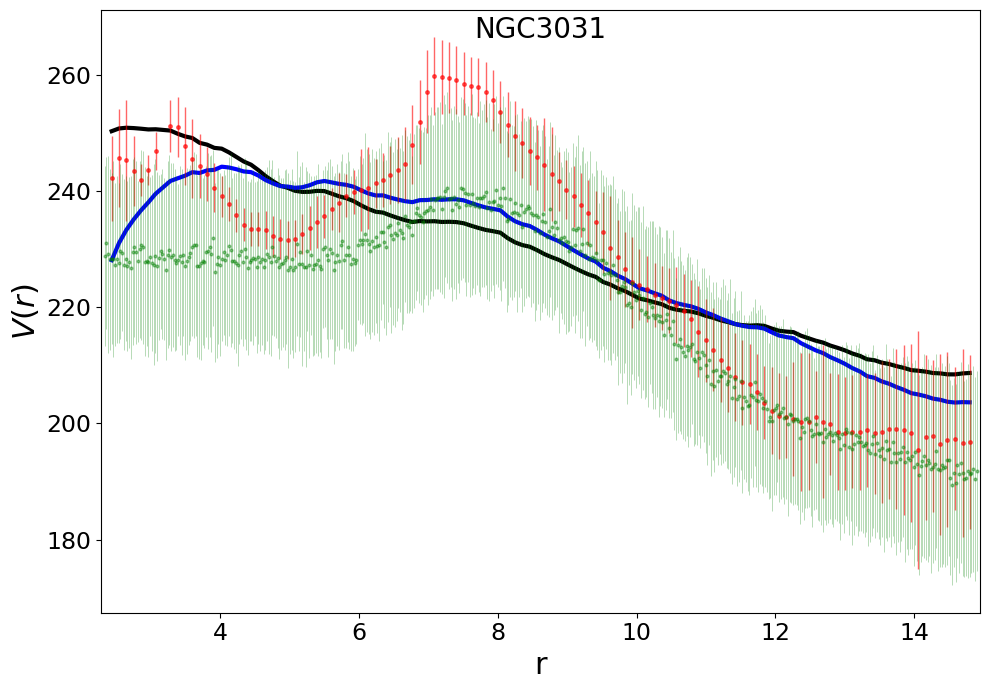

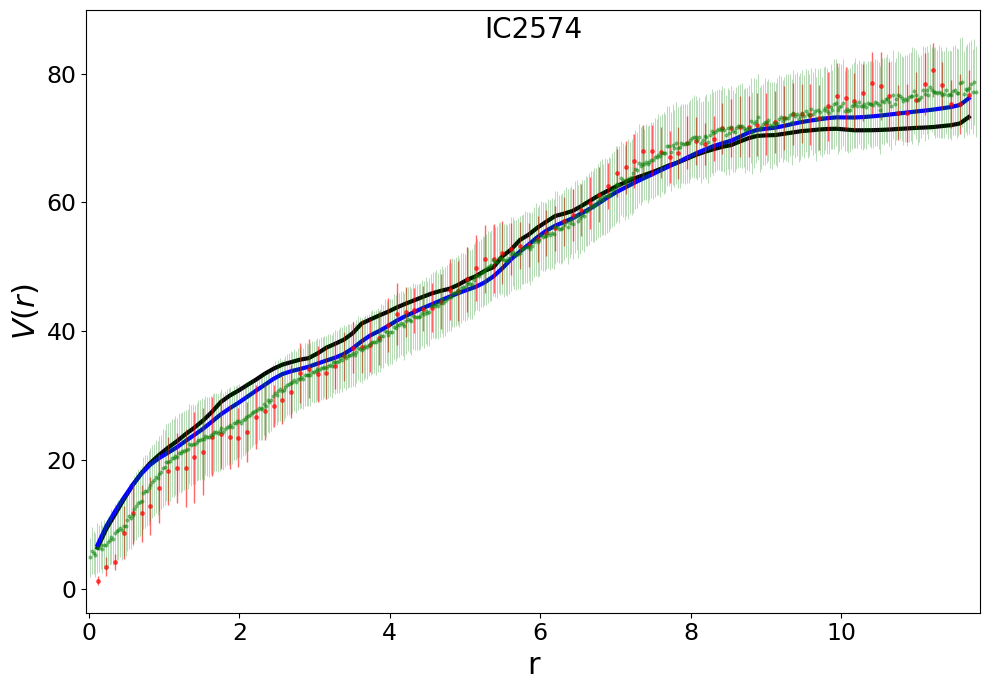

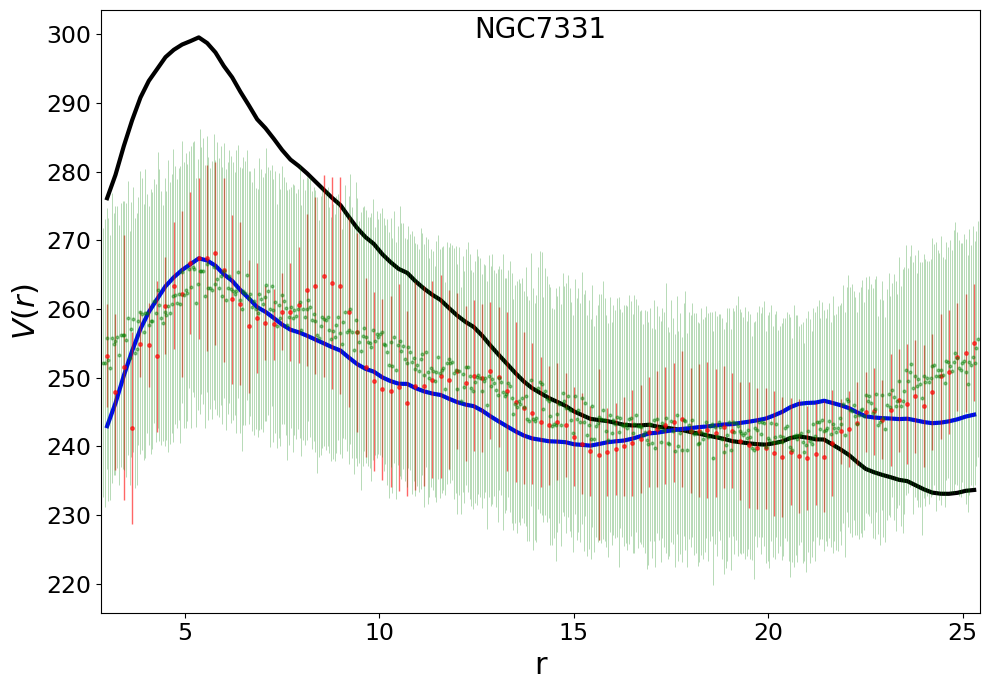

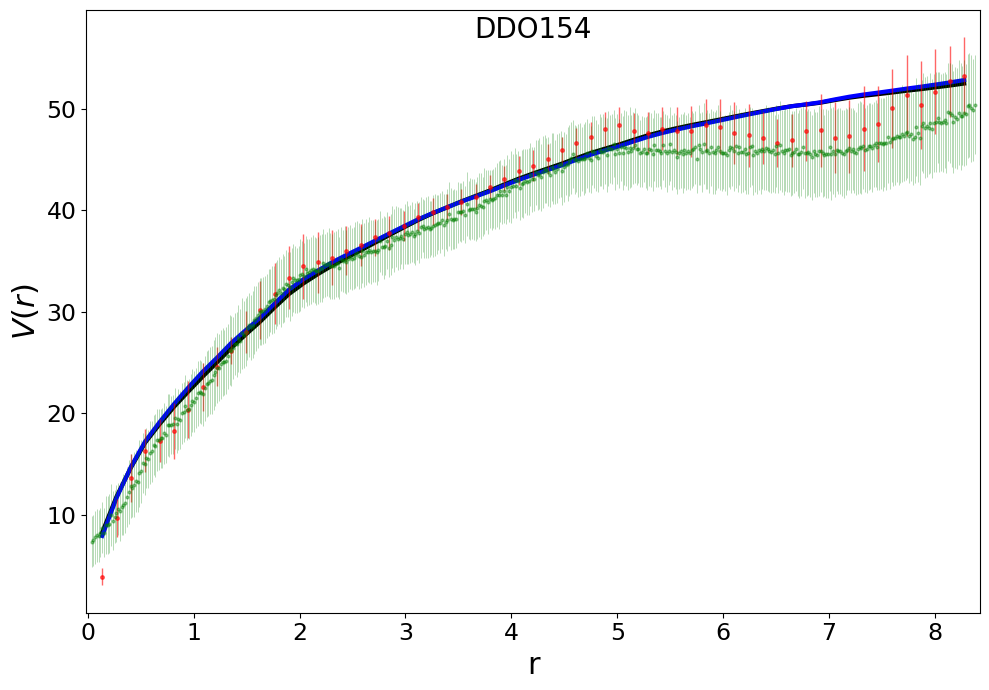

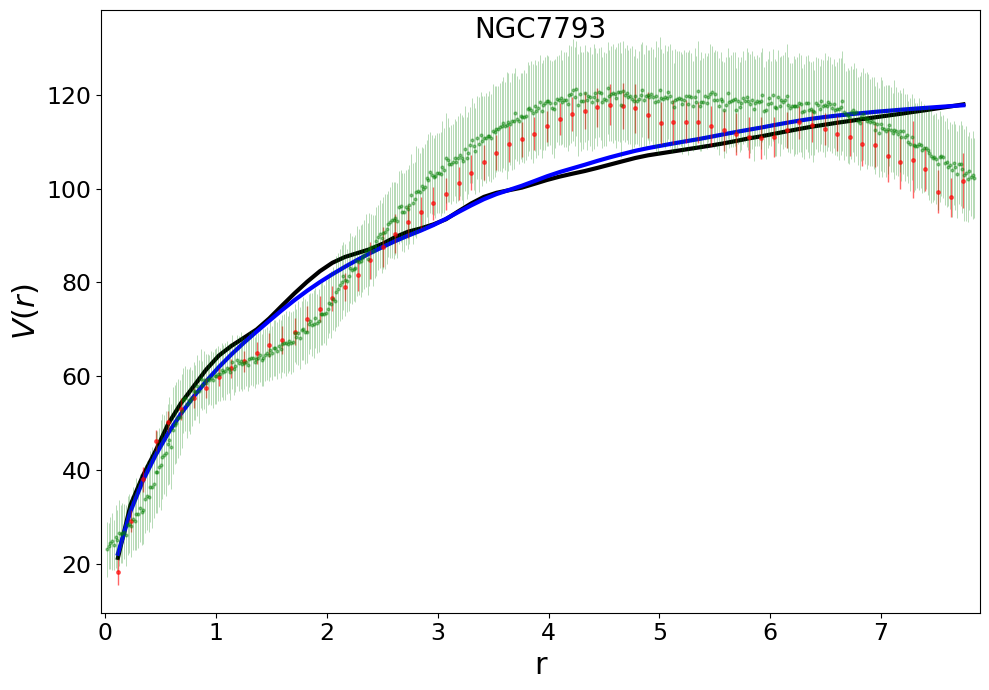

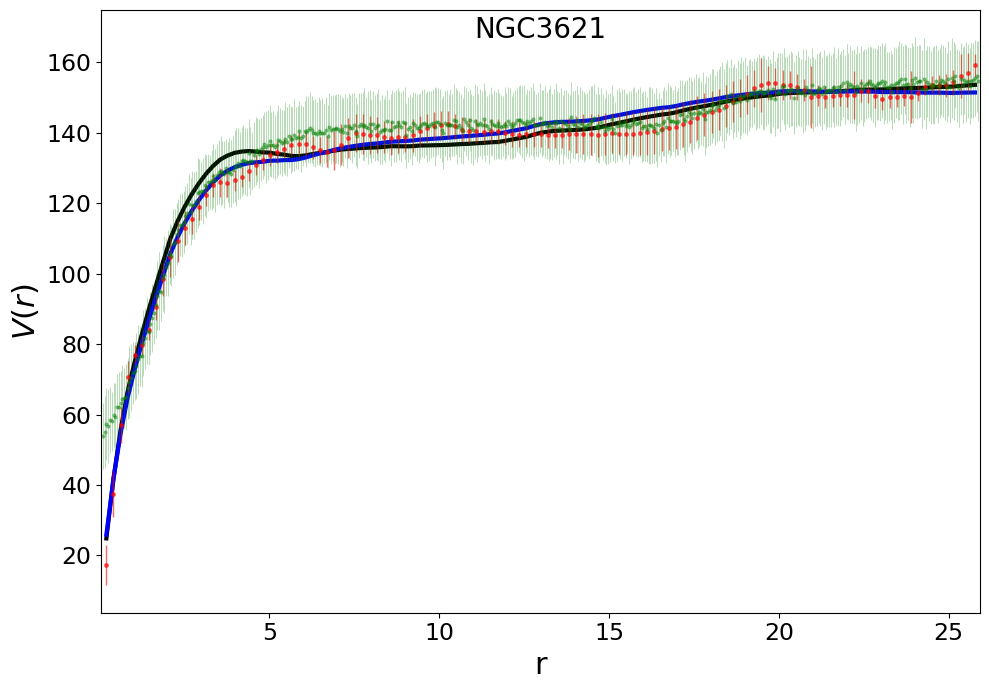

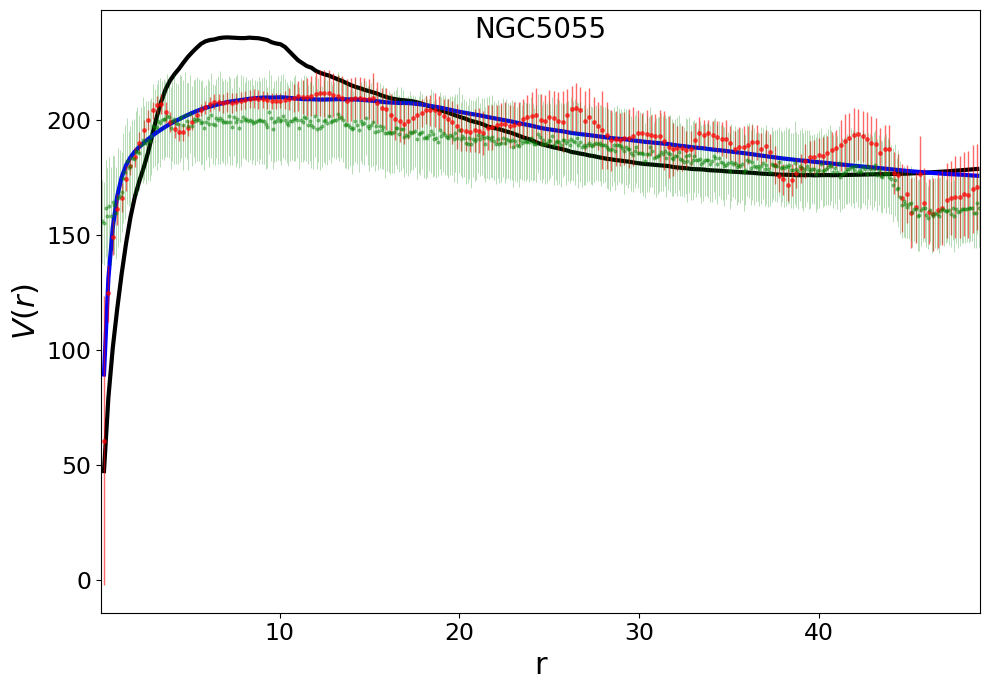

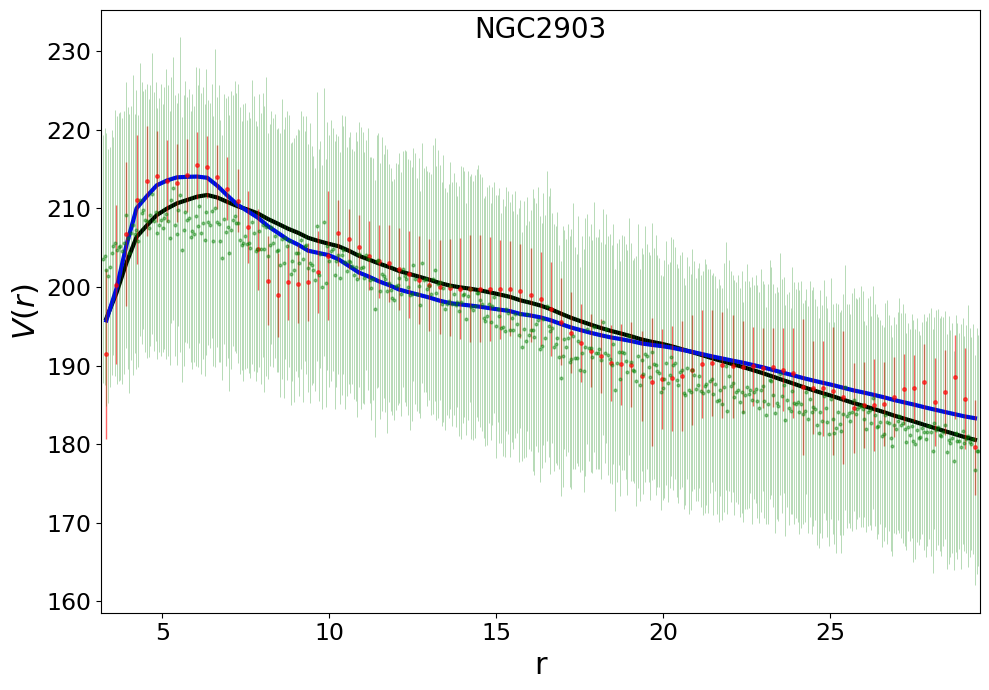

In [10]:
history_all = []

# for idx, file in enumerate(files[:1]):
for idx, root in enumerate(roots):
    print("Model {}/{}".format(idx+1, len(roots)))
    print("-"*10)
    print(root)
    
    history_ind = {}
    
    data = np.loadtxt(dir_name+root+".NFW.fix.REV.dat", skiprows=12)   
    
    df = pd.DataFrame(data, columns=['Radius', 'vgas', 'vdisk', 'vbulge', 
                                     'vobs', 'err_vobs', 'Vu', 'Vt','Rxv', 'Vxy'])
    
#     data_free = np.loadtxt(dir_name+root_name(files[idx])+".NFW.free.REV.dat", skiprows=12)
    data_free = np.loadtxt(dir_name+root+".NFW.free.REV.dat", skiprows=12)
    df_free = pd.DataFrame(data_free, columns=['Radius', 'vgas', 'vdisk', 'vbulge', 
                                     'vobs', 'err_vobs', 'Vu', 'Vt','Rxv', 'Vxy'])
    N = len(df.values)
    df = df[['Radius', 'vobs','err_vobs', 'Vt']]


    randomize = np.random.permutation(N)
    data = df.values[randomize]

    z = data[:,0]
    y = data[:,1:3]
    
    scalerz = StandardScaler()
    scalerz.fit(z.reshape(-1,1))
    # apply transform
    z = scalerz.transform(z.reshape(-1,1))
    
    split = 0.8
    ntrain = int(split * len(z))
    indx = [ntrain]
    z_train, z_test = np.split(z, indx)
    y_train, y_test = np.split(y, indx)
    
    print("X_train shape: {} | y_train shape: {} | x_val shape: {} | y_val shape: {}".format(np.shape(z_train), 
                                                                                             np.shape(y_train), 
                                                                                             np.shape(z_test), 
                                                                                             np.shape(y_test)))

        
    model = tf.keras.models.load_model('models/{}.h5'.format(root), custom_objects={'MCDropout': MCDropout})


    # Generate test data
    test_batch_size = 500
    # x_test = np.random.uniform(0, 2., test_batch_size)
    x_test = np.linspace(min(df['Radius'].values)-0.1, max(df['Radius'].values)+0.1, test_batch_size)

    mc_dropout_num = 100  # Run Dropout 100 times
    predictions = np.zeros((mc_dropout_num, test_batch_size, 2))
    for i in range(mc_dropout_num):
        predictions[i] = model.predict(scalerz.transform(x_test.reshape(-1,1)))

    # get mean results and its varience
    prediction_mc_dropout = np.mean(predictions, axis=0)
    std_mc_dropout = np.std(predictions, axis=0)
    
    # plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    overlapping = 0.6
    # Plotting
    plt.figure(figsize=(10, 7), dpi=100)
    sigma = np.sqrt(std_mc_dropout[:, 0]**2 + std_mc_dropout[:, 1]**2+ prediction_mc_dropout[:,1]**2)

    plt.plot(df['Radius'].values, df['Vt'].values, color='black', linewidth=3, label='NFW $\\Upsilon_*^{fix}$',alpha=1)
    
    plt.plot(df_free['Radius'].values, df_free['Vt'].values, color='blue', linewidth=3, label='NFW $\\Upsilon_*^{free}$', alpha=1)

    plt.errorbar(df['Radius'].values, df['vobs'].values, yerr=df['err_vobs'].values, fmt='.', 
                 color='red', elinewidth=1, ecolor='red', markersize=5, label='Observations', alpha=overlapping)

    plt.errorbar(x_test, prediction_mc_dropout[:,0], yerr=sigma, markersize=2, fmt='o', 
                 ecolor='green', capthick=2, elinewidth=0.5, alpha=overlapping-0.2, c='green',
                 label='Neural reconstruction')
    

    plt.ylabel("$V(r)$", fontsize=22)
    plt.xlabel("r", fontsize=22)
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)
    
    plt.title(root_name(files[idx]), y=0.94, fontsize=20)

    if idx == 0:
        leg = plt.legend(fontsize=18, loc='upper right', framealpha=0)
#         leg = plt.legend()
        for lh in leg.legendHandles: 
            lh.set_alpha(1)

    plt.xlim(min(df['Radius'].values)-0.15, max(df['Radius'].values)+0.15)
    plt.tight_layout()
        
    plt.savefig("figures/load_neural_reconstruction_RC_{}.png".format(idx+1), dpi=100)
          
    print("-"*10)


In [11]:
history_all = []
mse_free_vs_neural = [] 
mse_free_vs_data = []
mse_fix_vs_neural = [] 
mse_fix_vs_data = []
mse_neural_vs_data = []


for idx, root in enumerate(roots):
    print("Model {}/{}".format(idx+1, len(roots)))
    print("-"*10)
    
    history_ind = {}
    
    data = np.loadtxt(dir_name+root+".NFW.fix.REV.dat", skiprows=12) 
    df = pd.DataFrame(data, columns=['Radius', 'vgas', 'vdisk', 'vbulge', 
                                     'vobs', 'err_vobs', 'Vu', 'Vt','Rxv', 'Vxy'])
    
    data_free = np.loadtxt(dir_name+root+".NFW.free.REV.dat", skiprows=12)
    df_free = pd.DataFrame(data_free, columns=['Radius', 'vgas', 'vdisk', 'vbulge', 
                                     'vobs', 'err_vobs', 'Vu', 'Vt','Rxv', 'Vxy'])
    N = len(df.values)
    df = df[['Radius', 'vobs','err_vobs', 'Vt']]
    df_free = df_free[['Radius', 'vobs','err_vobs', 'Vt']]


    randomize = np.random.permutation(N)
    data = df.values[randomize]

    z = data[:,0]
    y = data[:,1:3]
    
    scalerz = StandardScaler()
    scalerz.fit(z.reshape(-1,1))
    # apply transform
    z = scalerz.transform(z.reshape(-1,1))
    
    split = 0.8
    ntrain = int(split * len(z))
    indx = [ntrain]
    z_train, z_test = np.split(z, indx)
    y_train, y_test = np.split(y, indx)
    
        
    model = tf.keras.models.load_model('models/{}.h5'.format(root), custom_objects={'MCDropout': MCDropout})


    # Generate test data
    test_batch_size_fix = len(df['Radius'].values)
    test_batch_size_free = len(df_free['Radius'].values)

    mc_dropout_num = 100  # Run Dropout 100 times
    predictions_fix = np.zeros((mc_dropout_num, test_batch_size_fix, 2))
    predictions_free = np.zeros((mc_dropout_num, test_batch_size_free, 2))
    for i in range(mc_dropout_num):
        predictions_fix[i] = model.predict(scalerz.transform(df['Radius'].values.reshape(-1,1)))
        predictions_free[i] = model.predict(scalerz.transform(df_free['Radius'].values.reshape(-1,1)))

    # get mean results and its varience
    prediction_mc_dropout_fix = np.mean(predictions_fix, axis=0)
    std_mc_dropout_fix = np.std(predictions_fix, axis=0)
    
    prediction_mc_dropout_free = np.mean(predictions_free, axis=0)
    std_mc_dropout_free = np.std(predictions_free, axis=0)
    
    mse_fix_vs_data.append(mean_squared_error(df['Vt'].values, df['vobs'].values))
    mse_free_vs_data.append(mean_squared_error(df_free['Vt'].values, df_free['vobs'].values))
    mse_neural_vs_data.append(mean_squared_error(prediction_mc_dropout_fix[:,0], df['vobs'].values))
    
    mse_fix_vs_neural.append(mean_squared_error(df['Vt'].values, prediction_mc_dropout_fix[:,0]))    
    mse_free_vs_neural.append(mean_squared_error(df_free['Vt'].values, prediction_mc_dropout_free[:,0]))

    
    print("-"*10)


Model 1/17
----------
3/3 [==============================] - 0s 21ms/step
----------
Model 2/17
----------
9/9 [==============================] - 0s 5ms/step
----------
Model 3/17
----------
3/3 [==============================] - 0s 19ms/step
----------
Model 4/17
----------
5/5 [==============================] - 0s 9ms/step
----------
Model 5/17
----------
2/2 [==============================] - 0s 10ms/step
----------
Model 6/17
----------
1/1 [==============================] - 0s 80ms/step
----------
Model 7/17
----------
3/3 [==============================] - 0s 30ms/step
----------
Model 8/17
----------
7/7 [==============================] - 0s 11ms/step
----------
Model 9/17
----------
4/4 [==============================] - 0s 8ms/step
----------
Model 10/17
----------
4/4 [==============================] - 0s 22ms/step
----------
Model 11/17
----------
4/4 [==============================] - 0s 2ms/step
----------
Model 12/17
----------
4/4 [==============================] - 0s 12

3/3 [==============================] - 0s 1ms/step
----------
Model 5/17
----------
2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 1ms/step
----------
Model 6/17
----------
7/7 [==============================] - 0s 1000us/step


7/7 [==============================] - 0s 1ms/step
----------
Model 7/17
----------
3/3 [==============================] - 0s 1ms/step


3/3 [==============================] - 0s 1ms/step
----------
Model 8/17
----------
2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 1ms/step
----------
Model 9/17
----------
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
----------
Model 10/17
----------
3/3 [==============================] - 0s 1ms/step


3/3 [==============================] - 0s 1ms/step
----------
Model 11/17
----------
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
----------
Model 12/17
----------
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
----------
Model 13/17
----------
7/7 [==============================] - 0s 928us/step


7/7 [==============================] - 0s 893us/step
----------
Model 14/17
----------
1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step
----------
Model 15/17
----------
9/9 [==============================] - 0s 881us/step


9/9 [==============================] - 0s 945us/step
----------
Model 16/17
----------
4/4 [==============================] - 0s 969us/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 946us/step
----------
Model 17/17
----------
4/4 [==============================] - 0s 979us/step


4/4 [==============================] - 0s 1ms/step
----------


In [12]:
for idx, root in enumerate(roots):   
    print('{} & & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \ \ '.format(roots[idx],
                                                                           mse_fix_vs_data[idx], 
                                                                           mse_free_vs_data[idx],
                                                                           mse_neural_vs_data[idx], 
                                                                           mse_fix_vs_neural[idx], 
                                                                           mse_free_vs_neural[idx]
                                                                                 ))
    print("\hline")
    
print("Means:")
print('{:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f}'.format(np.mean(mse_fix_vs_data), 
                                                          np.mean(mse_free_vs_data),
                                                          np.mean(mse_neural_vs_data), 
                                                          np.mean(mse_fix_vs_neural), 
                                                          np.mean(mse_free_vs_neural)
                                                         ))

NGC925 & & 66.52 & 34.65 & 23.77 & 72.45 & 46.64 \ \ 
\hline
NGC2403 & & 11.56 & 11.35 & 11.63 & 12.36 & 13.43 \ \ 
\hline
NGC4736 & & 46.66 & 43.68 & 41.08 & 35.21 & 33.17 \ \ 
\hline
NGC2841 & & 32.43 & 21.50 & 27.73 & 63.55 & 32.06 \ \ 
\hline
NGC2976 & & 25.88 & 11.15 & 2.34 & 31.41 & 16.57 \ \ 
\hline
NGC2366 & & 15.75 & 7.60 & 3.13 & 17.84 & 5.60 \ \ 
\hline
NGC3198 & & 100.39 & 7.98 & 29.38 & 124.95 & 28.21 \ \ 
\hline
NGC6946 & & 119.78 & 51.66 & 26.93 & 105.45 & 28.37 \ \ 
\hline
NGC3521 & & 335.01 & 225.37 & 69.44 & 290.64 & 194.09 \ \ 
\hline
NGC3031 & & 144.49 & 103.98 & 106.82 & 164.00 & 104.90 \ \ 
\hline
IC2574 & & 14.59 & 8.55 & 2.50 & 9.66 & 3.60 \ \ 
\hline
NGC7331 & & 309.23 & 19.78 & 11.64 & 277.61 & 16.82 \ \ 
\hline
DDO154 & & 2.83 & 2.91 & 3.42 & 6.79 & 6.60 \ \ 
\hline
NGC7793 & & 59.74 & 53.47 & 20.41 & 87.88 & 78.10 \ \ 
\hline
NGC3621 & & 12.24 & 10.17 & 24.17 & 23.97 & 19.69 \ \ 
\hline
NGC5055 & & 239.95 & 42.84 & 128.33 & 391.17 & 102.04 \ \ 
\hline
NGC290